In [1]:
import numpy as np
import matplotlib.pyplot as plt

## using numpy

In [3]:
#Function to calculate eucledian distance between 2 points
def euclidean_distance(point1, point2):
    return np.linalg.norm(point1-point2)

#Function to find neighbors of a point within a given radius
def find_neighbors(data, point_index, eps):
    neighbors = []
    for i, point in enumerate(data):
        if euclidean_distance(data[point_index], point) < eps and i != point_index:
            neighbors.append(i)
    return neighbors

In [6]:
#Function to expand a cluster
def expand_cluster(data, labels, point_index, neighbors, cluster_id, eps, min_samples):
    labels[point_index] = cluster_id
    for neighbor in neighbors:
        if labels[neighbor] == 0 :
            labels[neighbor] = cluster_id
            new_neighbours = find_neighbors(data, neighbor, eps)
            if len(new_neighbours) >= min_samples:
                neighbors.extend(new_neighbours)
        elif labels[neighbor] == -1:
                labels[neighbor] = cluster_id

In [7]:
def DBSCAN(data, sps, min_samples):
    num_points = len(data)
    labels = np.zeros(num_points, dtype=int)
    
    cluster_id = 0
    for i in range(num_points):
        if labels[i] != 0:
            continue
        neighbors = find_neighbors(data, i, eps)
        if len(neighbors) < min_samples:
            labels[i] = -1 #Mark as noise
        else:
            cluster_id += 1
            expand_cluster(data, labels, i, neighbors, cluster_id, eps, min_samples)
    return labels

In [8]:
#Create the synthetic data

In [9]:
np.random.seed(0)
data = np.concatenate([np.random.randn(100, 2) * 0.3 + np.array([2, 2]),
                      np.random.randn(100, 2) * 0.3 + np.array([-2, -2]),
                      np.random.randn(20, 2) * 0.3 + np.array([5, -5]),
                      ])

In [10]:
data

array([[ 2.5292157 ,  2.12004716],
       [ 2.2936214 ,  2.67226796],
       [ 2.5602674 ,  1.70681664],
       [ 2.28502653,  1.95459284],
       [ 1.96903434,  2.12317955],
       [ 2.04321307,  2.43628205],
       [ 2.22831132,  2.0365025 ],
       [ 2.13315897,  2.1001023 ],
       [ 2.44822372,  1.93845252],
       [ 2.09392031,  1.74377128],
       [ 1.23410306,  2.19608558],
       [ 2.25933086,  1.77735049],
       [ 2.68092639,  1.5636903 ],
       [ 2.01372756,  1.94384484],
       [ 2.45983376,  2.44080763],
       [ 2.04648423,  2.11344876],
       [ 1.73366428,  1.40576106],
       [ 1.89562636,  2.04690469],
       [ 2.3690872 ,  2.36071395],
       [ 1.88380195,  1.90930917],
       [ 1.68543411,  1.57399462],
       [ 1.48811894,  2.58523262],
       [ 1.84710435,  1.86857771],
       [ 1.62416139,  2.23324711],
       [ 1.51583065,  1.93617792],
       [ 1.73136003,  2.11607075],
       [ 1.84675846,  1.64581034],
       [ 1.99154533,  2.12849956],
       [ 2.01995517,

In [11]:
#Set Parameters
eps = 0.5
min_samples = 5

In [13]:
#Run DBSCAN Clustering
cluster_labels = DBSCAN(data, eps, min_samples)

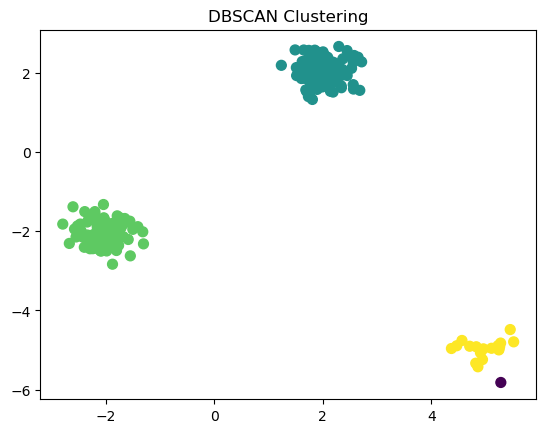

In [14]:
#Plot the results
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.show()

## 2. using Sklean

In [17]:
from sklearn.cluster import DBSCAN

In [18]:
np.random.seed(0)
data = np.concatenate([np.random.randn(100, 2) * 0.3 + np.array([2, 2]),
                      np.random.randn(100, 2) * 0.3 + np.array([-2, -2]),
                      np.random.randn(20, 2) * 0.3 + np.array([5, -5]),
                      ])

In [19]:
#Set Parameters
eps = 0.5
min_samples = 5

In [20]:
#Run DBSCAN Clustering
dbscan = DBSCAN(eps = eps, min_samples = min_samples)
cluster_labels = dbscan.fit_predict(data)

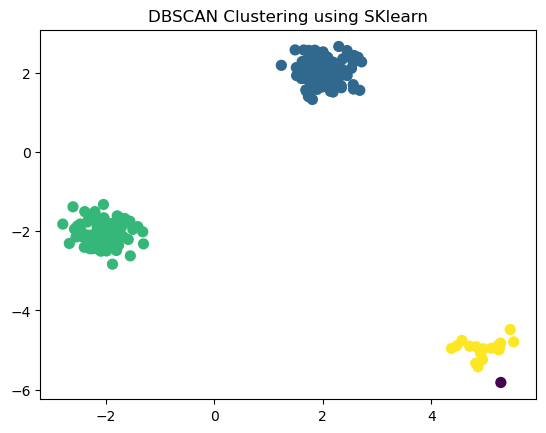

In [21]:
#Plot the results
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering using SKlearn')
plt.show()